<a href="https://colab.research.google.com/github/FatiBuuloloo/churn_bank_classification-mini_project_001/blob/main/bank%20churn%20classification%20with%20MLP%20deep%20learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project 001

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, classification_report, average_precision_score, precision_recall_curve, auc
import tensorflow as tf
from keras import regularizers
from keras.callbacks import EarlyStopping,ReduceLROnPlateau
from tensorflow import keras

In [ ]:
data = pd.read_csv("/content/Dataset.csv")
data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [ ]:
data.shape

(175028, 25)

In [ ]:
data.isnull().sum()

,0
Surname,0
CreditScore,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0
HasCrCard,0
IsActiveMember,0
EstimatedSalary,0
Exited,0


In [ ]:
data.dropna(inplace=True)

In [ ]:
data.head(5)

,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,...,France,Germany,Spain,Female,Male,Mem__no__Products,Cred_Bal_Sal,Bal_sal,Tenure_Age,Age_Tenure_product
0,2023,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.090909,99.0
1,2024,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,...,1,0,0,0,1,2.0,0.000000,0.000000,0.030303,33.0
2,1236,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,...,1,0,0,0,1,0.0,0.000000,0.000000,0.250000,400.0
3,1362,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,...,1,0,0,0,1,1.0,1022.940581,1.760655,0.058824,68.0
4,491,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,...,0,0,1,0,1,2.0,0.000000,0.000000,0.151515,165.0


In [ ]:
data.columns

Index(['Surname', 'CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts',
       'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited',
       'Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2',
       'Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany', 'Spain',
       'Female', 'Male', 'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal',
       'Tenure_Age', 'Age_Tenure_product'],
      dtype='object')

In [ ]:
col_to_drop = ['Surname','Surname_tfidf_0', 'Surname_tfidf_1', 'Surname_tfidf_2','Surname_tfidf_3', 'Surname_tfidf_4', 'France', 'Germany',
'Mem__no__Products', 'Cred_Bal_Sal', 'Bal_sal','Tenure_Age', 'Age_Tenure_product']
data.drop(columns=col_to_drop,inplace=True)

In [ ]:
data.shape

(175028, 12)

In [ ]:
data.head(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Spain,Female,Male
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0,0,1
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,0,0,1
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0,0,1
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,0,0,1
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,1,0,1


In [ ]:
data[data.Balance==0]

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Spain,Female,Male
0,668.0,33.0,3.0,0.0,2.0,1,0,181449.97,0,0,0,1
1,627.0,33.0,1.0,0.0,2.0,1,1,49503.50,0,0,0,1
2,678.0,40.0,10.0,0.0,2.0,1,0,184866.69,0,0,0,1
4,716.0,33.0,5.0,0.0,2.0,1,1,15068.83,0,1,0,1
8,676.0,43.0,4.0,0.0,2.0,1,0,142917.13,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
175019,841.0,28.0,4.0,0.0,2.0,1,1,179436.60,0,1,0,1
175022,726.0,36.0,2.0,0.0,1.0,1,0,195192.40,0,1,0,1
175024,800.0,29.0,2.0,0.0,2.0,0,0,167773.55,0,0,1,0
175025,771.0,39.0,5.0,0.0,2.0,1,0,96270.64,0,0,0,1


In [ ]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Spain', 'Female',
       'Male'],
      dtype='object')

In [ ]:
salary_exited = data[data.Exited==1].EstimatedSalary
salary_not_exited = data[data.Exited==0].EstimatedSalary

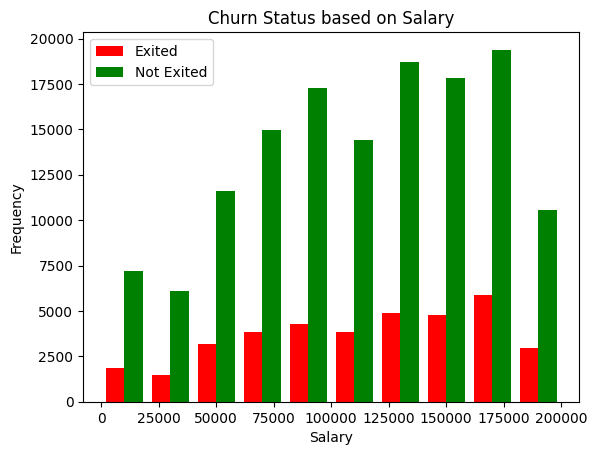

In [ ]:
plt.hist([salary_exited,salary_not_exited], color=["red","green"], label=["Exited", "Not Exited"])
plt.title("Churn Status based on Salary")
plt.xlabel("Salary")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
credit_score_exited = data[data.Exited==1].CreditScore
credit_score_not_exited = data[data.Exited==0].CreditScore

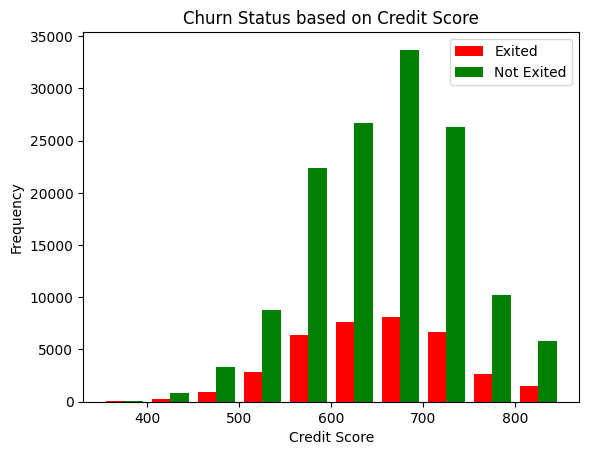

In [ ]:
plt.hist([credit_score_exited,credit_score_not_exited], color=["red","green"], label=["Exited", "Not Exited"])
plt.title("Churn Status based on Credit Score")
plt.xlabel("Credit Score")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
tenure_exited = data[data.Exited==1].Tenure
tenure_not_exited = data[data.Exited==0].Tenure

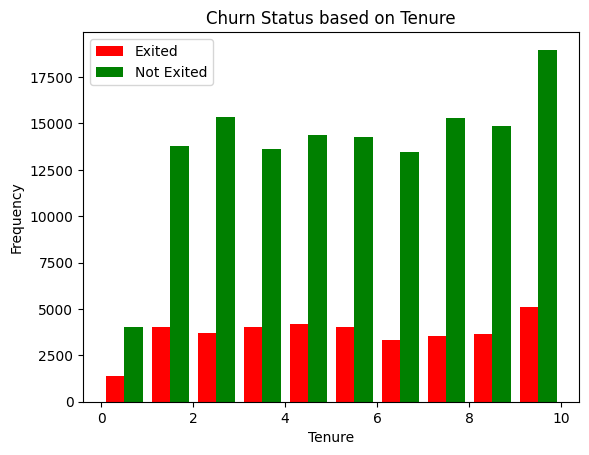

In [ ]:
plt.hist([tenure_exited,tenure_not_exited], color=["red","green"], label=["Exited", "Not Exited"])
plt.title("Churn Status based on Tenure")
plt.xlabel("Tenure")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
balance_exited = data[data.Exited==1].Balance
balance_not_exited = data[data.Exited==0].Balance

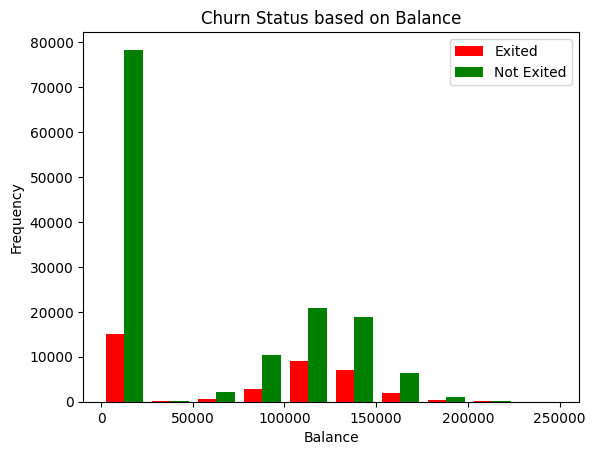

In [ ]:
plt.hist([balance_exited,balance_not_exited], color=["red","green"],label=["Exited", "Not Exited"])
plt.title("Churn Status based on Balance")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
data_not_exit = data[data.Exited==0]
balance_active_member = data_not_exit[data_not_exit.IsActiveMember==1].Balance
balance_not_active = data_not_exit[data_not_exit.IsActiveMember==0].Balance

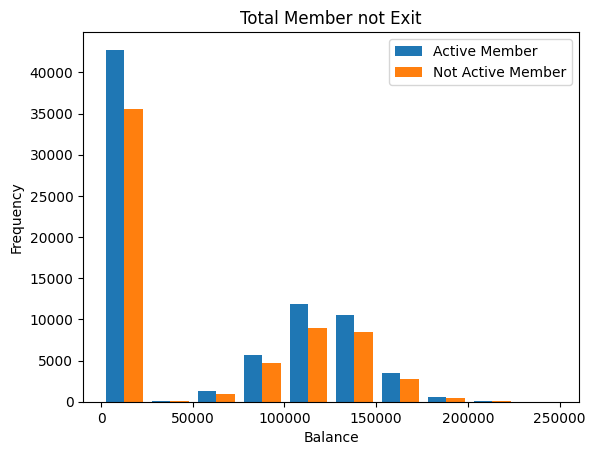

In [ ]:
plt.hist([balance_active_member, balance_not_active],label=["Active Member", "Not Active Member"])
plt.title("Total Member not Exit")
plt.xlabel("Balance")
plt.ylabel("Frequency")
plt.legend()

In [ ]:
data.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Spain', 'Female',
       'Male'],
      dtype='object')

In [ ]:
#sns.pairplot(data,hue="Exited", vars=['Age','CreditScore','Tenure', 'Balance','EstimatedSalary'])

In [ ]:
data["Gender"] = data["Male"].apply(lambda x: 1 if x==1 else 0)
data["Prod_per_Tenure"] = data["NumOfProducts"]/(data["Tenure"]+1)
data["Balance_per_product"] = data["Balance"]/(data["NumOfProducts"]+1)
data["Age_non_active"] =data.Age*(1-data.IsActiveMember)
data["Credit_per_tenure"] = data["CreditScore"]/(data.Tenure+1)

In [54]:
key_features = ['Balance', 'EstimatedSalary', 'CreditScore', 'Age', 'NumOfProducts', 'IsActiveMember']
overlap_check = data.groupby(key_features)['Exited'].agg(['mean', 'count'])
ambiguous_data = overlap_check[(overlap_check['count'] > 1) &
                               (overlap_check['mean'] > 0) &
                               (overlap_check['mean'] < 1)]
print(f"Found {len(ambiguous_data)} profiles that have the Churn and Stay labels simultaneously.")

Found 1645 profiles that have the Churn and Stay labels simultaneously.


In [55]:
data_with_overlap = data.merge(ambiguous_data.reset_index()[key_features],
                               on=key_features,
                               how='left',
                               indicator=True)

data_cleaned = data_with_overlap[data_with_overlap['_merge'] == 'left_only'].drop(columns=['_merge'])

print(f"Before Cleaned: {len(data)}")
print(f"After Cleaned: {len(data_cleaned)}")

Before Cleaned: 175028
After Cleaned: 170793


In [ ]:
data

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Spain,Female,Male,Gender,Prod_per_Tenure,Balance_per_product,Age_non_active,Credit_per_tenure
0,668.0,33.0,3.0,0.00,2.0,1,0,181449.97,0,0,0,1,1,0.500000,0.000,33.0,167.000000
1,627.0,33.0,1.0,0.00,2.0,1,1,49503.50,0,0,0,1,1,1.000000,0.000,0.0,313.500000
2,678.0,40.0,10.0,0.00,2.0,1,0,184866.69,0,0,0,1,1,0.181818,0.000,40.0,61.636364
3,581.0,34.0,2.0,148882.54,1.0,1,1,84560.88,0,0,0,1,1,0.333333,74441.270,0.0,193.666667
4,716.0,33.0,5.0,0.00,2.0,1,1,15068.83,0,1,0,1,1,0.333333,0.000,0.0,119.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175023,644.0,28.0,7.0,155060.41,1.0,1,0,29179.52,0,0,0,1,1,0.125000,77530.205,28.0,80.500000
175024,800.0,29.0,2.0,0.00,2.0,0,0,167773.55,0,0,1,0,0,0.666667,0.000,29.0,266.666667
175025,771.0,39.0,5.0,0.00,2.0,1,0,96270.64,0,0,0,1,1,0.333333,0.000,39.0,128.500000
175026,516.0,35.0,10.0,57369.61,1.0,1,1,101699.77,0,0,0,1,1,0.090909,28684.805,0.0,46.909091


In [ ]:
df_X = data_cleaned.drop(columns=["Exited"])
df_y = data_cleaned["Exited"]

In [ ]:
print(df_X.isna().sum())
print(df_y.isna().sum())

CreditScore            0
Age                    0
Tenure                 0
Balance                0
NumOfProducts          0
HasCrCard              0
IsActiveMember         0
EstimatedSalary        0
Spain                  0
Female                 0
Male                   0
Gender                 0
Prod_per_Tenure        0
Balance_per_product    0
Age_non_active         0
Credit_per_tenure      0
dtype: int64
0


In [ ]:
train1_X, test1_X, train_y, test1_y = train_test_split(df_X, df_y, test_size=0.3, random_state=24, stratify=df_y)
val1_X, test_X, val_y, test_y = train_test_split(test1_X, test1_y, test_size=0.2, random_state=24, stratify=test1_y)

In [ ]:
not_be_scaled=['HasCrCard',
       'IsActiveMember', 'Exited', 'Female', 'Male',
       'Gender']

In [ ]:
cols_to_scale = []
for item in data.columns:
    if item not in not_be_scaled:
        cols_to_scale.append(item)

In [ ]:
scaler=StandardScaler()
train1_X[cols_to_scale] = scaler.fit_transform(train1_X[cols_to_scale])
val1_X[cols_to_scale] = scaler.transform(val1_X[cols_to_scale])
test_X[cols_to_scale] = scaler.transform(test_X[cols_to_scale])

In [ ]:
smote=SMOTE(
sampling_strategy="auto",
random_state=24,
k_neighbors=10
)
trainX_, trainy_ = smote.fit_resample(train1_X,train_y)

In [56]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='all')
X_res, y_res = tl.fit_resample(train1_X, train_y)

print(f"Data Before Tomek Links: {len(trainX_)}")
print(f"Data After Tomek Links: {len(X_res)}")

Data Before Tomek Links: 189978
Data After Tomek Links: 107513


# Bangun Model

In [ ]:
model = keras.Sequential([
keras.layers.Dense(128, input_shape=(trainX_.shape[1],),activation="tanh"),
keras.layers.Dropout(0.3),
keras.layers.Dense(100, activation="tanh"),
keras.layers.Dropout(0.2),
keras.layers.Dense(64, activation="tanh",
kernel_regularizer=regularizers.l2(0.01)
),
keras.layers.Dropout(0.1),
keras.layers.Dense(1,activation="sigmoid")
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
reduce_lr = ReduceLROnPlateau(
    monitor='val_accuracy',
    factor=0.2,
    patience=5,
    min_lr=0.00001,
    verbose=)
earlystop=EarlyStopping(monitor='val_loss',patience=10)

In [ ]:
METRICS = [
    keras.metrics.BinaryAccuracy(name='accuracy'),
    keras.metrics.Precision(name='precision'),
    keras.metrics.Recall(name='recall'),
    keras.metrics.AUC(name='auc'),
]
model.compile(optimizer="rmsprop",loss="binary_crossentropy",metrics=METRICS)

In [ ]:
def score1(true, predict):
    print(f"Accuracy Score: {accuracy_score(true, predict)}")
    print(f"AUC Score: {roc_auc_score(true, predict)}")
    print(classification_report(true, predict))
    print()

In [ ]:
class_weights={0:1,1:5}
model.fit(X_res,y_res,
epochs=50,batch_size=64,
validation_data=(val1_X,val_y),
class_weight=class_weights,
callbacks=[reduce_lr,earlystop]
)

Epoch 1/50
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8010 - auc: 0.8762 - loss: 0.9795 - precision: 0.4562 - recall: 0.7915 - val_accuracy: 0.8085 - val_auc: 0.8782 - val_loss: 0.4231 - val_precision: 0.5230 - val_recall: 0.7701 - learning_rate: 0.0010
Epoch 2/50
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8348 - auc: 0.9122 - loss: 0.6546 - precision: 0.5148 - recall: 0.8280 - val_accuracy: 0.8105 - val_auc: 0.8803 - val_loss: 0.4412 - val_precision: 0.5261 - val_recall: 0.7819 - learning_rate: 0.0010
Epoch 3/50
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8395 - auc: 0.9137 - loss: 0.6418 - precision: 0.5223 - recall: 0.8248 - val_accuracy: 0.7970 - val_auc: 0.8811 - val_loss: 0.4467 - val_precision: 0.5038 - val_recall: 0.7980 - learning_rate: 0.0010
Epoch 4/50
1680/1680 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8451 - auc: 0.9149 - loss: 0.6342 - precision: 0.5320 - recall: 0.8278 - val_accuracy: 0.8292 - val_auc: 0.8798 - val_loss: 0.40

In [ ]:
prediction=model.predict(test_X)

321/321 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


In [ ]:
prediction1 = np.where (prediction.flatten()>=0.7,1,0)
score1(test_y,prediction1)

Accuracy Score: 0.8604605776736924
AUC Score: 0.7940830878683987
              precision    recall  f1-score   support

           0       0.92      0.91      0.91      8142
           1       0.65      0.68      0.67      2106

    accuracy                           0.86     10248
   macro avg       0.79      0.79      0.79     10248
weighted avg       0.86      0.86      0.86     10248




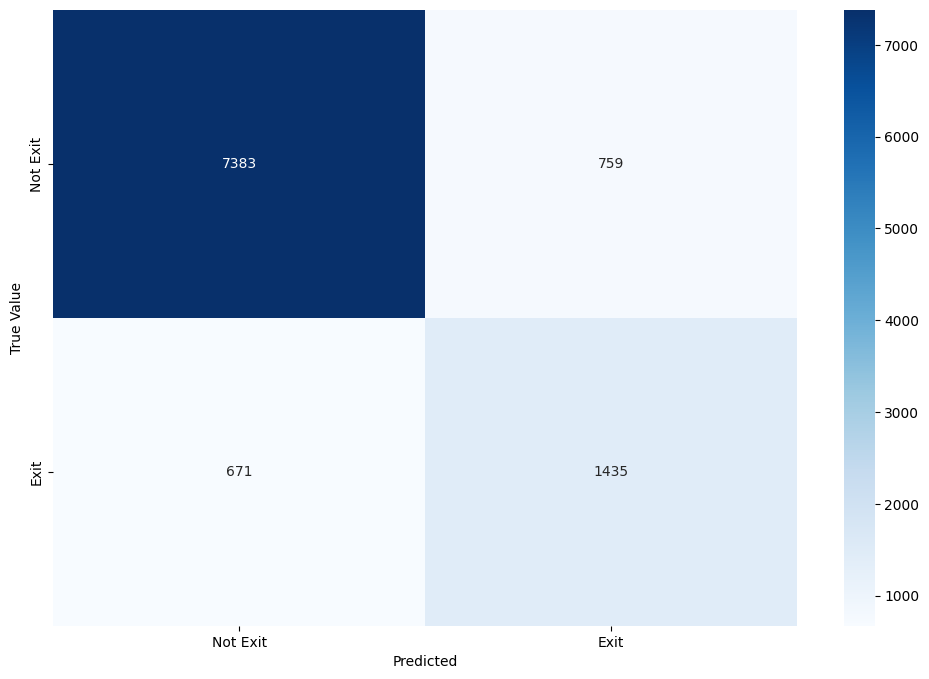

In [ ]:
label=["Not Exit", "Exit"]
cm_model = confusion_matrix(test_y, prediction1)
plt.figure(figsize=(12,8))
sns.heatmap(cm_model, annot=True, fmt='d', cmap='Blues',
  xticklabels = label,
yticklabels = label)
plt.xlabel('Predicted')
plt.ylabel('True Value')
plt.show()

In [ ]:
def calculate_rank_metrics(y_true, y_probs):
    roc_auc = roc_auc_score(y_true, y_probs)
    pr_auc = average_precision_score(y_true, y_probs)
    precision, recall, _ = precision_recall_curve(y_true, y_probs)
    pr_auc_val = auc(recall, precision)

    return roc_auc, pr_auc

In [ ]:
calculate_rank_metrics(test_y, prediction.flatten())

(np.float64(0.8904861896960481), np.float64(0.735973154005271))

In [ ]:
from sklearn.utils import resample
def evaluated_with_undersampling_averaging(y_true, y_probs, iterations=100):
    all_roc = []
    all_pr = []
    all_f1 = []
    df = pd.DataFrame({'label': y_true, 'prob': y_probs})
    df_major = df[df.label == 0]
    df_minor = df[df.label == 1]
    n_minor = len(df_minor)

    for i in range(iterations):
        df_major_downsampled = resample(df_major,
                                        replace=False,
                                        n_samples=n_minor,
                                        random_state=i)
        df_balanced = pd.concat([df_major_downsampled, df_minor])
        roc, pr = calculate_rank_metrics(df_balanced.label, df_balanced.prob)
        all_roc.append(roc)
        all_pr.append(pr)

    return {
        "Mean AUC-ROC": np.mean(all_roc),
        "Mean AUC-PR": np.mean(all_pr),
        "Std Dev": np.std(all_roc)
    }

In [ ]:
result = evaluated_with_undersampling_averaging(test_y, prediction.flatten())
print(result)

{'Mean AUC-ROC': np.float64(0.8902137383444759), 'Mean AUC-PR': np.float64(0.8941026410791731), 'Std Dev': np.float64(0.0030861089090064705)}
